### IMPORTING THE NECESSARY LIBRARIES & THE DATA

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [7]:
pwd

'C:\\Users\\Hrishi_rich'

In [8]:
import os
path = 'W:\DS PROJECTS WITH AMAN KHARWAL\ONLINE SHOPPING INTENTION ANALYSIS'
os.chdir(path)

In [9]:
pwd

'W:\\DS PROJECTS WITH AMAN KHARWAL\\ONLINE SHOPPING INTENTION ANALYSIS'

In [10]:
data = pd.read_csv('online_shoppers_intention.csv')

### LOOK AT THE MISSING VALUES
Now let’s have a look at the missing values and fill them by using the fillna method in Python pandas:

In [12]:
missing = data.isnull().sum()
print(missing)

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [13]:
data.fillna(0, inplace = True)

### LOOKING AT THE PRODUCT RELATED BOUNCE RATES OF CUSTOMERS

In [14]:
x = data.iloc[:, [5,6]].values
x.shape

(12330, 2)

### APPLYING K-elbow METHOD TO DETERMINE THE NUMBER OF CLUSTERING GROUPS:

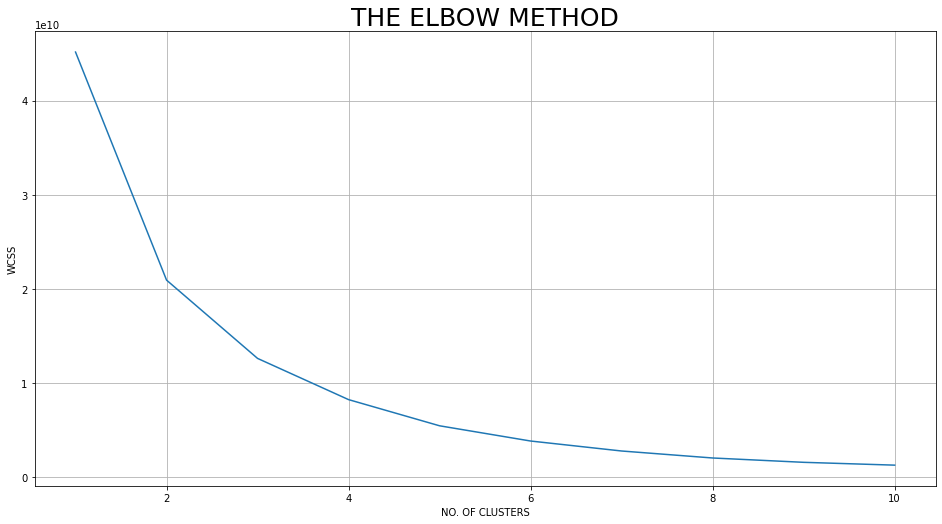

In [20]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('THE ELBOW METHOD', fontsize = 25)
plt.xlabel('NO. OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

### K MEANS CLUSTERING
According to the graph above, the maximum curvature is at the second index, that is, the number of optimal clustering groups for the duration of the product and the bounce rates is 2. Once the number of clusterings determined, we apply the K Means method and plot the clusters:

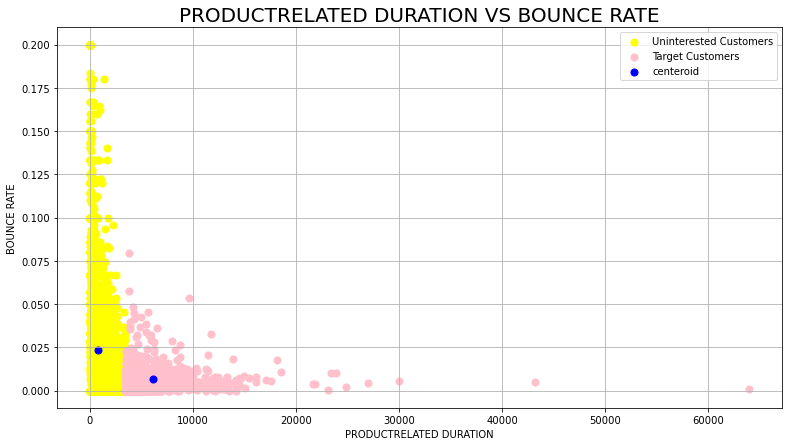

In [23]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('PRODUCTRELATED DURATION VS BOUNCE RATE', fontsize = 20)
plt.grid()
plt.xlabel('PRODUCTRELATED DURATION')
plt.ylabel('BOUNCE RATE')
plt.legend()
plt.show()

* Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

* Since K-Means is not a supervised learning method, we are adopting other ways of evaluating its clustering result. The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers):

Adjusted rand index: 
0.08344649929017146


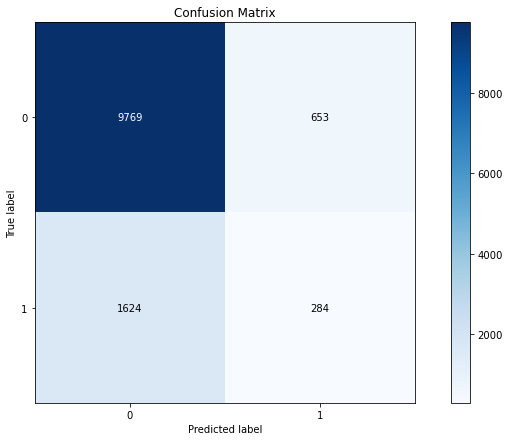

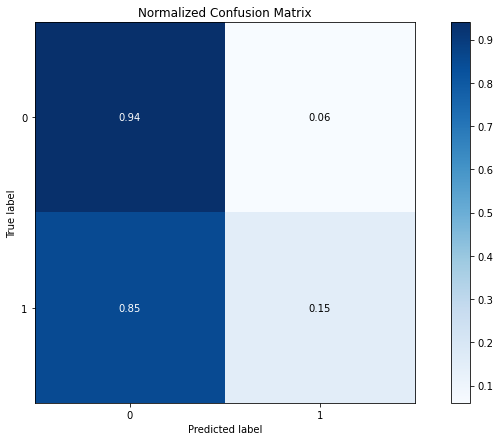

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# Get predicted clustering result label
labels_pred = y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

### OBSERVATION FROM ABOVE PLOTS
From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high.

So it is clear that we have poorly bundled many successful revenue sessions as uninterested customers, which means when the high bounce rate combined with a short product-related page duration, there are still a lot of customers. targets.